In [326]:
# import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

In [327]:
# road data

df_song = pd.read_csv('data2/song.csv')
df_tag = pd.read_csv('data2/tag.csv')
df_download = pd.read_csv('data2/download.csv')

### df_download 전처리

In [354]:
# Music::Song 타입만 추출

df_download_id = df_download[df_download['model_type'] == 'Music::Song']

# 필요없는 열 삭제

df_download_id = df_download_id[['user_id', 'model_id']]

In [328]:
df_song.columns

Index(['id', 'is_free', 'download_count', 'play_count', 'created_at',
       'is_visible', 'grade', 'bpm', 'length'],
      dtype='object')

### df_tag 전처리

In [329]:
# Music::Song 타입만 추출

df_tag_song = df_tag[df_tag['model_type'] == 'Music::Song']

# 필요없는 열 삭제

df_tag_song = df_tag_song[['name', 'model_id']]

# 결측치 확인 및 제거

print('결측치 제거 전 \n', df_tag_song.isnull().sum())
df_tag_song.drop(index = df_tag_song[df_tag_song['name'].isnull() == True].index, axis=0, inplace=True)
print('결측치 제거 후 \n', df_tag_song.isnull().sum())

결측치 제거 전 
 name        543
model_id      0
dtype: int64
결측치 제거 후 
 name        0
model_id    0
dtype: int64


In [330]:
# tag_list 생성, head(n) >> 태그 갯수를 상위 n개까지 설정

tag_list = df_tag_song['name'].value_counts().head(10).index

In [331]:
# model_id 별 groupby (태그 명 리스트로 묶음)

df_tag_song_list = df_tag_song.groupby('model_id')['name'].apply(list) # as_index = False 불가능 (why?) >> 아래 단계 추가

# series to dataframe, index 초기화
df_tag_song_list = pd.DataFrame(df_tag_song_list)
df_tag_song_list['model_id'] = df_tag_song_list.index
df_tag_song_list.reset_index(drop=True, inplace=True)
df_tag_song_list

,name,model_id
0,"[여행, 브이로그, 가벼운, 편안한, 잔잔, 비트, 여행Vlog, 오프닝]",2
1,"[영화, 애니메이션, 두려운, 비트, 우울, 긴장, 실패, 미스테리, 웅장, 심각,...",3
2,"[영화, 애니메이션, 패션, 두려운, 편안함, 예능, 비트, 긴장, 미스테리, 웅장...",4
3,"[잔잔, 일상, 달달&연애]",5
4,"[잔잔, 장면전환]",6
...,...,...
6320,"[펑크(Funk), 역동적, 기쁜, 스포츠, 게임방송, 신남, 빠른, 광고음악, C...",9462
6321,"[펑크(Funk), 역동적, 기쁜, 스포츠, 게임방송, 예능, 신남, 기대, 궁금,...",9463
6322,"[펑크(Funk), 역동적, 기쁜, 스포츠, 게임방송, 예능, 신남, 기대, 궁금,...",9464
6323,"[얼터너티브, 기쁜, 가벼운, 밝은, 애니메이션, 키즈&펫방, 귀여운, 빠른, 엉뚱...",9465


### df_song 전처리

In [332]:
# # 시, 분 초 제거

# df_song['created_at'] = df_song['created_at'].str.split(' ').str[0]

# # 시계열 형 변환

# df_song['created_at'] = pd.to_datetime(df_song['created_at'])

# 필요한 열 추출

df_song = df_song[['id', 'grade', 'bpm']]

# 결측치 확인

print('결측치 제거 전 \n', df_song.isnull().sum())
df_song.drop(index = df_song[df_song['bpm'].isnull() == True].index, axis=0, inplace=True)
print('결측치 제거 후 \n', df_song.isnull().sum())

df_song

결측치 제거 전 
 id       0
grade    0
bpm      9
dtype: int64
결측치 제거 후 
 id       0
grade    0
bpm      0
dtype: int64


,id,grade,bpm
0,2,1.3.F,116.0
1,3,1.3.F,175.0
2,4,1.3.F,160.0
3,5,1.3.F,116.0
4,6,1.3.F,173.0
...,...,...,...
6137,9462,1.1.A,150.0
6138,9463,1.1.A,110.0
6139,9464,1.1.A,110.0
6140,9465,1.1.A,128.0


### merge data

In [333]:
# merge data

merge_song_tag = df_song.merge(right=df_tag_song_list, left_on='id', right_on='model_id')

# 필요없는 열 제거
merge_song_tag.drop(columns='model_id', axis=1, inplace=True)

merge_song_tag

,id,grade,bpm,name
0,2,1.3.F,116.0,"[여행, 브이로그, 가벼운, 편안한, 잔잔, 비트, 여행Vlog, 오프닝]"
1,3,1.3.F,175.0,"[영화, 애니메이션, 두려운, 비트, 우울, 긴장, 실패, 미스테리, 웅장, 심각,..."
2,4,1.3.F,160.0,"[영화, 애니메이션, 패션, 두려운, 편안함, 예능, 비트, 긴장, 미스테리, 웅장..."
3,5,1.3.F,116.0,"[잔잔, 일상, 달달&연애]"
4,6,1.3.F,173.0,"[잔잔, 장면전환]"
...,...,...,...,...
6126,9462,1.1.A,150.0,"[펑크(Funk), 역동적, 기쁜, 스포츠, 게임방송, 신남, 빠른, 광고음악, C..."
6127,9463,1.1.A,110.0,"[펑크(Funk), 역동적, 기쁜, 스포츠, 게임방송, 예능, 신남, 기대, 궁금,..."
6128,9464,1.1.A,110.0,"[펑크(Funk), 역동적, 기쁜, 스포츠, 게임방송, 예능, 신남, 기대, 궁금,..."
6129,9465,1.1.A,128.0,"[얼터너티브, 기쁜, 가벼운, 밝은, 애니메이션, 키즈&펫방, 귀여운, 빠른, 엉뚱..."


In [334]:
# 결측치 확인

merge_song_tag.isnull().sum()

id       0
grade    0
bpm      0
name     0
dtype: int64

In [335]:
merge_song_tag[merge_song_tag['name'] == '']

,id,grade,bpm,name


In [336]:
df_tag_song

,name,model_id
0,드라이브,1633
1,힐링,1633
2,가을,1633
3,현자타임,1651
844,일렉트로닉,2444
...,...,...
170066,호기심많은,9466
170067,플룻,9466
170068,실로폰,9466
170069,동화,9466


In [337]:
tag_list = df_tag_song['name']
tag_list

0          드라이브
1            힐링
2            가을
3          현자타임
844       일렉트로닉
          ...  
170066    호기심많은
170067       플룻
170068      실로폰
170069       동화
170070       키즈
Name: name, Length: 92632, dtype: object

In [338]:
# tag_list 생성, head(n) >> 태그 갯수를 상위 n개까지 설정

tag_list = df_tag_song['name'].value_counts().head(100).index

In [339]:
df_tag_song

,name,model_id
0,드라이브,1633
1,힐링,1633
2,가을,1633
3,현자타임,1651
844,일렉트로닉,2444
...,...,...
170066,호기심많은,9466
170067,플룻,9466
170068,실로폰,9466
170069,동화,9466


In [340]:
df_tag_song.groupby('name')[['model_id']].count().sort_values(by = 'model_id', ascending=False)

,model_id
name,
밝은,1667
일렉트로닉,1428
잔잔,1421
일상,1340
피아노,1249
...,...
난감함,1
낙엽,1
나무실로폰,1


In [341]:
df_tag_song['name'].value_counts().head(28)

밝은             1667
일렉트로닉          1428
잔잔             1421
일상             1340
피아노            1249
비트             1248
편안한            1190
영화             1180
역동적            1133
신남             1056
팝              1020
시네마틱           1014
키즈&펫방           967
패션              875
electronica     853
토크              798
가벼운             797
댄스              788
오프닝             771
영화음악            736
기쁜              732
편안함             713
여행Vlog          710
귀여운             703
얼터너티브           679
뷰티              656
광고              640
광고음악            633
Name: name, dtype: int64

In [342]:
# 태그별 열 생성 후 존재 여부에 따라 데이터 입력

for i in tag_list:
    df_tag_song_list[i]=df_tag_song_list['name'].apply(lambda x: 1 if i in x else 0)
df_tag_song_list.head()

C:\Users\jhc74\AppData\Local\Temp\ipykernel_9920\3066609238.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tag_song_list[i]=df_tag_song_list['name'].apply(lambda x: 1 if i in x else 0)
C:\Users\jhc74\AppData\Local\Temp\ipykernel_9920\3066609238.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_tag_song_list[i]=df_tag_song_list['name'].apply(lambda x: 1 if i in x else 0)


,name,model_id,밝은,일렉트로닉,잔잔,일상,피아노,비트,편안한,영화,...,하우스,펑크(Funk),공포,여름,카페음악,로파이,hiphop,웨딩,보컬,방송
0,"[여행, 브이로그, 가벼운, 편안한, 잔잔, 비트, 여행Vlog, 오프닝]",2,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,"[영화, 애니메이션, 두려운, 비트, 우울, 긴장, 실패, 미스테리, 웅장, 심각,...",3,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,"[영화, 애니메이션, 패션, 두려운, 편안함, 예능, 비트, 긴장, 미스테리, 웅장...",4,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,"[잔잔, 일상, 달달&연애]",5,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"[잔잔, 장면전환]",6,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [343]:
# 모델링을 위한 데이터 전처리

df_encoding = df_tag_song_list.copy()

# import encoder

from sklearn.preprocessing import LabelEncoder

# encoding

encoder = LabelEncoder()
# df_encoding['grade'] = encoder.fit_transform(df_encoding['grade'])

# 필요없는 열 삭제

df_encoding.drop(columns='name', axis=1, inplace=True)

df_encoding

,model_id,밝은,일렉트로닉,잔잔,일상,피아노,비트,편안한,영화,역동적,...,하우스,펑크(Funk),공포,여름,카페음악,로파이,hiphop,웨딩,보컬,방송
0,2,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6320,9462,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6321,9463,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6322,9464,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
6323,9465,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [344]:
# 데이터 표준화

# from sklearn.preprocessing import StandardScaler
# std_scaler=StandardScaler()
# std_scaler.fit(df_encoding.iloc[:,1:])
# data=std_scaler.transform(df_encoding.iloc[:,1:])

# from sklearn.decomposition import PCA
# pca=PCA(n_components=2)
# pca.fit(data)
# data_pca=pca.transform(data)
# data_pca.shape

from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(df_encoding.iloc[:,1:])
data_pca=pca.transform(df_encoding.iloc[:,1:])
data_pca.shape

(6325, 2)

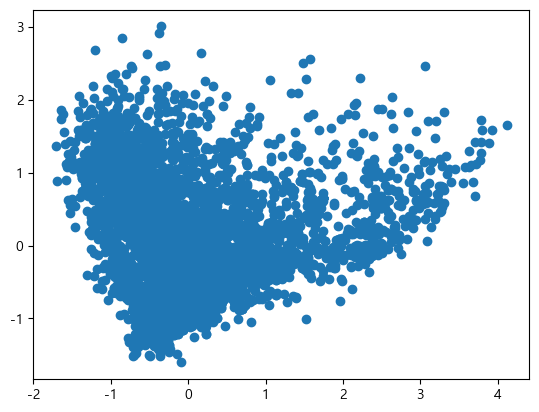

In [345]:
plt.scatter(data_pca[:,0],data_pca[:,1])
plt.show()

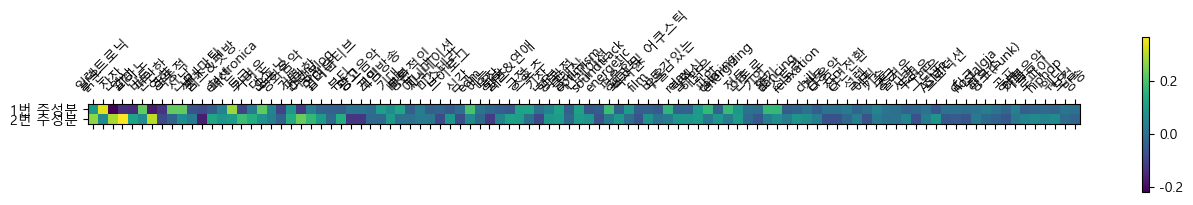

In [346]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1],['1번 주성분','2번 주성분'])
plt.colorbar()
plt.xticks(range(100), df_encoding.columns[1:], rotation=45)
plt.show()

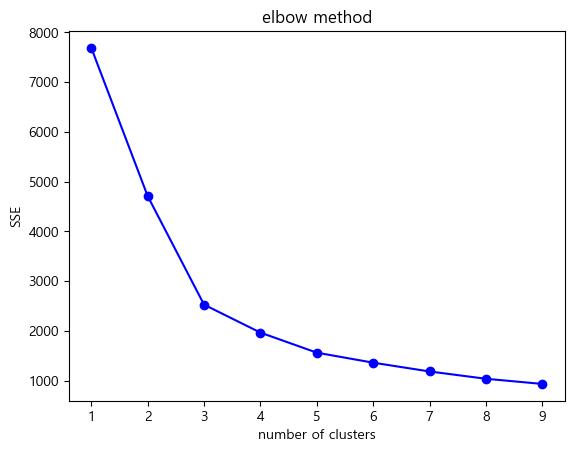

In [347]:
from sklearn.cluster import KMeans
df_data_pca = pd.DataFrame(data_pca, columns = ['PC1', 'PC2'])
def elbow(data, length):
    sse = [] # sum of squre error 오차제곱합
    for i in range(1, length):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(data)
        # SSE 값 저장
        sse.append(kmeans.inertia_)
    plt.plot(range(1, length), sse, 'bo-')
    plt.title("elbow method")
    plt.xlabel("number of clusters")
    plt.ylabel("SSE")
    plt.show()
elbow(df_data_pca,10)

In [348]:
km = KMeans(n_clusters = 3,random_state=0)
df_data_pca['cluster_kmeans']= km.fit_predict(df_data_pca)
df_data_pca

,PC1,PC2,cluster_kmeans
0,-0.289619,0.602357,0
1,-0.350729,-0.977921,1
2,-0.239353,-0.680391,1
3,-0.590407,0.269864,0
4,-0.374103,-0.240171,1
...,...,...,...
6320,0.739158,-0.648110,1
6321,0.820038,-0.570096,1
6322,0.820038,-0.570096,1
6323,-0.000399,0.277815,1


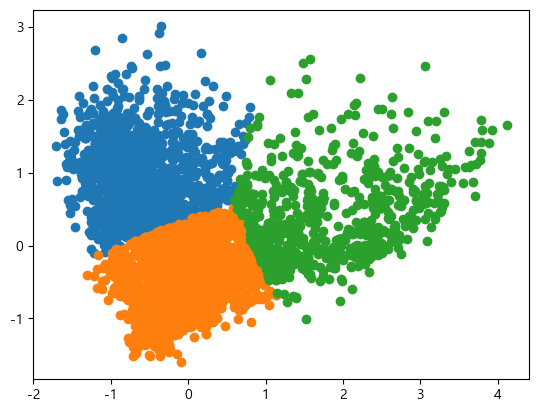

In [349]:
for i in df_data_pca['cluster_kmeans'].unique():
  data=df_data_pca[df_data_pca['cluster_kmeans']==i]
  plt.scatter(data['PC1'],data['PC2'])
plt.show()

In [350]:
df_encoding['cluster']=list(df_data_pca['cluster_kmeans'])
df_encoding

,model_id,밝은,일렉트로닉,잔잔,일상,피아노,비트,편안한,영화,역동적,...,펑크(Funk),공포,여름,카페음악,로파이,hiphop,웨딩,보컬,방송,cluster
0,2,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,4,0,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,5,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6320,9462,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
6321,9463,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
6322,9464,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
6323,9465,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [351]:
df_encoding_cluster = df_encoding[['model_id', 'cluster']]
df_encoding_cluster

,model_id,cluster
0,2,0
1,3,1
2,4,1
3,5,0
4,6,1
...,...,...
6320,9462,1
6321,9463,1
6322,9464,1
6323,9465,1


In [352]:
for i in range(3):
    print(df_encoding.groupby('cluster').sum().iloc[i].sort_values(ascending=False).head(10))

model_id    10083613
일상              1069
잔잔              1047
편안한             1000
밝은               681
편안함              644
피아노              642
토크               567
키즈&펫방            399
뷰티               393
Name: 0, dtype: int64
model_id    24106545
시네마틱             747
영화               712
일렉트로닉            639
밝은               629
팝                622
광고               615
광고음악             608
역동적              573
비트               533
Name: 1, dtype: int64
model_id       4038524
일렉트로닉              678
electronica        583
비트                 482
댄스                 467
역동적                446
신남                 444
edm                387
energetic          345
energizing         336
Name: 2, dtype: int64


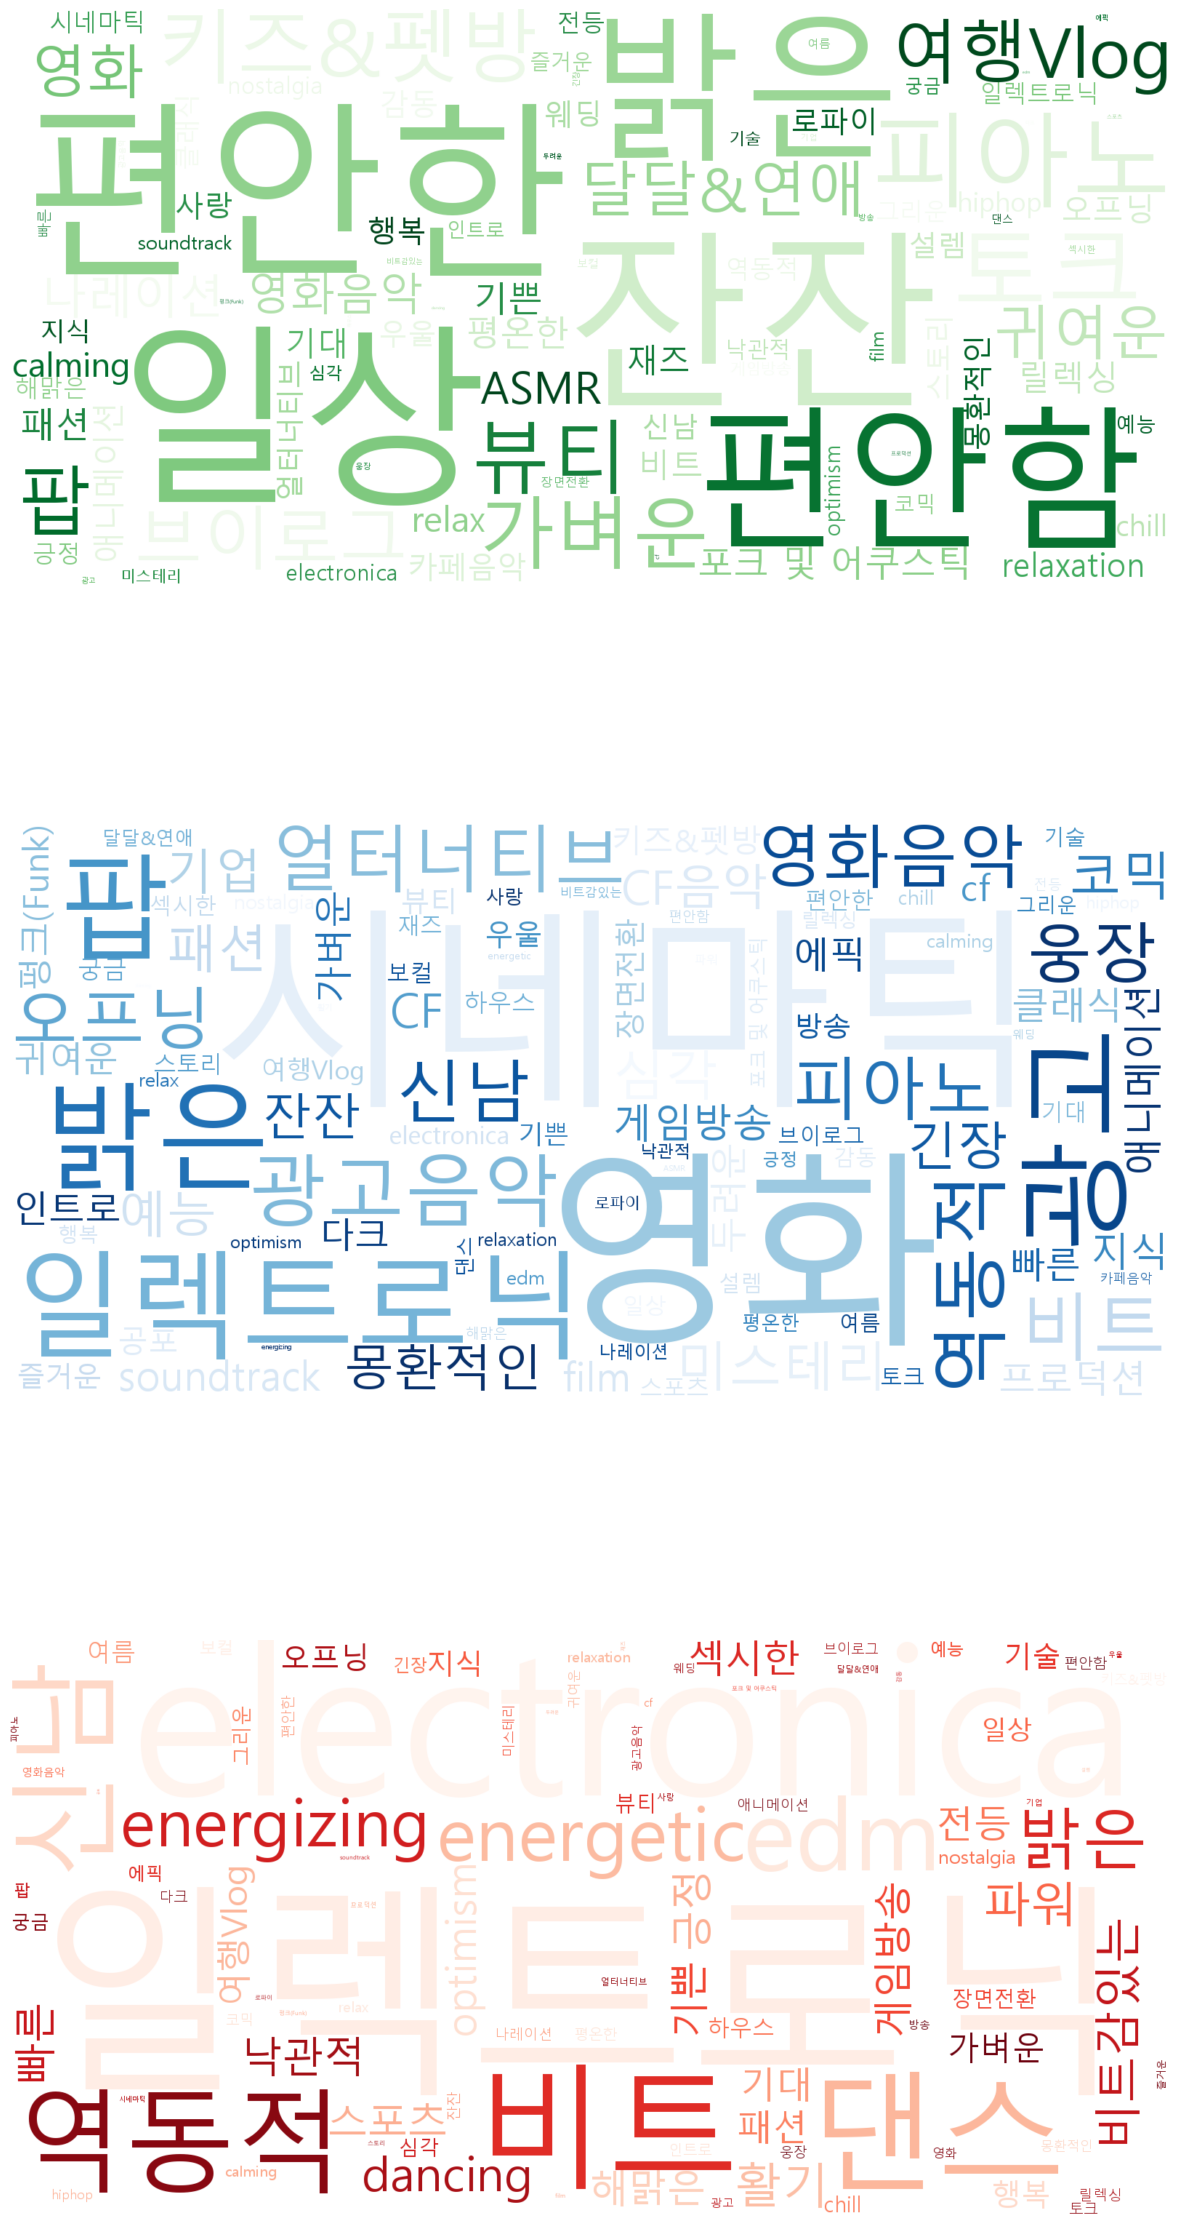

In [353]:
from wordcloud import WordCloud 
from PIL import *
plt.figure(figsize=(15,30))
palettes=['Greens_r','Blues_r','Reds_r']
for i in range(3):    
    words=df_encoding.groupby('cluster').sum().iloc[i,1:].sort_values(ascending=False).to_dict()
    wordcloud = WordCloud(
        font_path = 'malgun.ttf',
        background_color='white',
        colormap=palettes[i],
        width=1600,
        height=800,
    ).generate_from_frequencies(words)
    plt.subplot(3,1,i+1)
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.axis('off')
plt.show()

In [363]:
df_download_id

,user_id,model_id
0,13649,6114
8,56895,2717
11,56895,3026
14,56895,2776
15,56895,6219
...,...,...
530204,98561,9371
530205,117076,6464
530206,118130,6221
530209,118129,6265


In [364]:
df_encoding_cluster

,model_id,cluster
0,2,0
1,3,1
2,4,1
3,5,0
4,6,1
...,...,...
6320,9462,1
6321,9463,1
6322,9464,1
6323,9465,1


In [362]:
df_down_cluster_merge = df_download_id.merge(right=df_encoding_cluster, left_on='model_id', right_on='model_id')
df_down_cluster_merge

,user_id,model_id,cluster
0,13649,6114,0
1,57150,6114,0
2,36660,6114,0
3,55560,6114,0
4,57212,6114,0
...,...,...,...
219622,108276,9454,0
219623,69174,9466,1
219624,69174,9456,1
219625,72081,9444,0


In [373]:
df_user_cluster_cnt = pd.pivot_table(data = df_down_cluster_merge, index='user_id', columns='cluster', values='model_id', aggfunc='count')
df_user_cluster_cnt = df_user_cluster_cnt.fillna(0)
df_user_cluster_cnt

cluster,0,1,2
user_id,,,
1,56.0,55.0,16.0
12,7.0,5.0,0.0
29,7.0,4.0,0.0
30,7.0,38.0,1.0
82,1.0,3.0,0.0
...,...,...,...
118120,3.0,0.0,0.0
118122,1.0,0.0,0.0
118126,3.0,0.0,0.0
